In [41]:
# import lib
import sys
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from kumaraswamy import kumaraswamy
sns.set_style('darkgrid')
np.random.seed(42)

1 0
1 0
1 0
1 0
1 1
1 0
1 0
1 2
1 0
1 0
1 2
2 0
1 0
1 2
2 1
2 0
1 2
2 1
3 0
1 2
2 1
4 0
1 2
2 1
4 1
1 2
2 1
4 1
1 2
3 1
5 1
1 2
3 1
6 1
1 2
3 1
6 2
1 2
3 1
6 2
1 2
4 1
7 2
1 2
4 1
8 2
1 2
4 1
8 2
1 2
5 1
9 2
1 2
5 1
9 3
1 2
5 1
9 3
1 2
6 1
9 3
1 2
7 1
10 3
1 2
7 1
10 3
1 2
7 2
10 3
1 2
8 2
10 3
1 2
9 2
10 3
1 2
10 2
11 3
1 2
10 2
11 3
1 2
11 2
11 3
1 2
12 2
11 3
1 2
13 2
11 3
1 2
14 2
11 3
1 2
15 2
11 3
1 2
16 2
11 3
1 2
17 2
11 3
1 2
18 2
11 3
1 2
19 2
11 3
1 2
20 2
11 3
1 2
21 2
11 4
1 2
21 2
11 4
1 2
22 2
11 4
1 2
22 3
11 4
1 2
23 3
11 4
1 2
24 3
11 4
1 2
25 3
11 4
1 2
26 3
11 4
1 2
27 3
11 4
1 2
28 3
11 4
1 2
29 3
11 4
1 2
30 3
11 4
1 2
31 3
11 4
1 2
32 3
11 4
1 2
33 3
11 4
1 2
34 3
11 4
1 2
35 3
11 4
1 2
36 3
11 4
1 2
37 3
11 4
1 2
38 3
11 4
1 2
39 3
11 4
1 2
40 3
11 4
1 2
41 3
11 4
1 2
42 3
11 4
1 2
43 3
11 4
1 2
43 4
11 4
1 2
44 4
11 4
1 2
45 4
11 4
1 2
46 4
11 4
1 2
47 4
11 4
1 2
48 4
11 4
1 2
49 4
11 4
1 2
50 4
11 4
1 2
51 4
11 4
1 2
52 4
11 4
1 2
53 4
11 4
1 2
54 4
11 4
1 2
5

1 2
497 54
12 5
1 2
498 54
12 5
1 2
499 54
12 5
1 2
499 55
12 5
1 2
499 56
12 5
1 2
500 56
12 5
1 2
501 56
12 5
1 2
502 56
13 5
1 2
502 56
13 5
1 2
503 56
13 5
1 2
504 56
13 5
1 2
505 56
13 5
1 2
506 56
13 5
1 2
507 56
13 5
1 2
508 56
13 5
1 2
509 56
13 5
1 2
510 56
13 5
1 2
511 56
13 5
1 2
512 56
13 5
1 2
513 56
13 5
1 2
514 56
13 5
1 2
515 56
13 5
1 2
516 56
13 5
1 2
516 57
13 5
1 2
517 57
13 5
1 2
518 57
13 5
1 2
519 57
13 5
1 2
520 57
13 5
1 2
521 57
13 5
1 2
522 57
13 5
1 2
523 57
13 5
1 2
524 57
13 5
1 2
525 57
13 5
1 2
526 57
13 5
1 2
527 57
13 5
1 2
528 57
13 5
1 2
529 57
13 5
1 2
529 58
13 5
1 2
530 58
13 5
1 2
531 58
13 5
1 2
532 58
13 5
1 2
533 58
13 5
1 2
534 58
13 5
1 2
534 59
13 5
1 2
535 59
13 5
1 2
536 59
13 5
1 2
537 59
13 5
1 2
537 60
13 5
1 2
538 60
13 5
1 2
539 60
13 5
1 2
540 60
13 5
1 2
540 61
13 5
1 2
541 61
13 5
1 2
542 61
13 5
1 2
543 61
13 5
1 2
544 61
13 5
1 2
545 61
13 5
1 2
546 61
13 5
1 2
547 61
13 5
1 2
548 61
13 5
1 2
549 61
13 5
1 2
550 61
13 5
1 2
551 

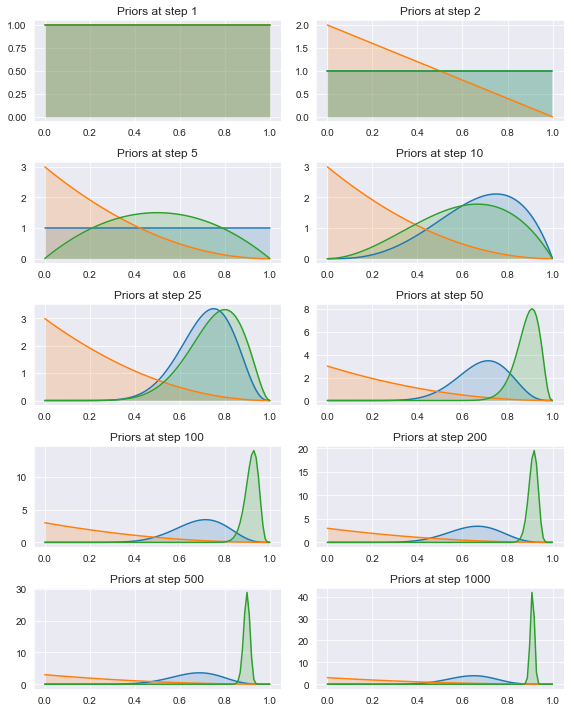

In [53]:
# Define the multi-armed bandits
nb_bandits = 3  # Number of bandits
# True probability of winning for each bandit
p_bandits = [0.45, 0.55, 0.90]

def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    #ax.set_xlim([0, 1])
    #ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')
    
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins   = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
#     bandit_priors = [kumaraswamy(a=w+0.5,b=1+t-w) for t, w in zip(trials, wins)]

    for t, w in zip(trials, wins):
        print(1+w,t-w)

    if step in plots: plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [d.rvs(size=1) for d in bandit_priors]
    
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1; wins  [chosen_bandit] += x

plt.tight_layout()
plt.show()

In [50]:
# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))

True prob=0.45;  Emperical prob=0.43;  Trials=898
True prob=0.55;  Emperical prob=0.60;  Trials=91
True prob=0.90;  Emperical prob=0.92;  Trials=11


[ 0.20264065 -0.3246262  -1.66632893  2.26444456  1.16672842]


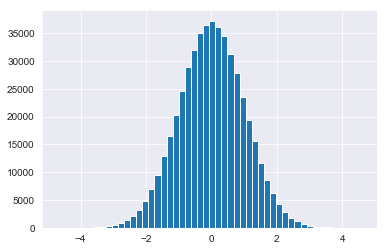

In [22]:
from scipy.stats import norm
gen = norm()
print(gen.rvs(size=5))
plt.hist(gen.rvs(size=500000),50)
plt.show()

# Reference 
1. Kite - AI-Powered Python Copilot. (2019). Kite.com. Retrieved 9 January 2019, from https://kite.com/python/docs/scipy.stats.distributions.rv_frozen.rvs
2. Multi-armed bandit implementation. (2019). Peterroelants.github.io. Retrieved 9 January 2019, from https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
3. kumaraswamy. (2018). PyPI. Retrieved 9 January 2019, from https://pypi.org/project/kumaraswamy/
